# **1.1  Understanding the Problem Statement**

In order to dynamically manage resources to run your website, you need to have an idea about the number of visitors who might arrive at your website at different points in time. So, the problem at hand is to predict the web traffic or number of sessions in the next hour based on the historical data.

# **1.2  Load Dataset**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

data=pd.read_csv('webtraffic.csv')

In [ ]:
data.shape

(4896, 2)

In [ ]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


# **1.3  Data Exploration**

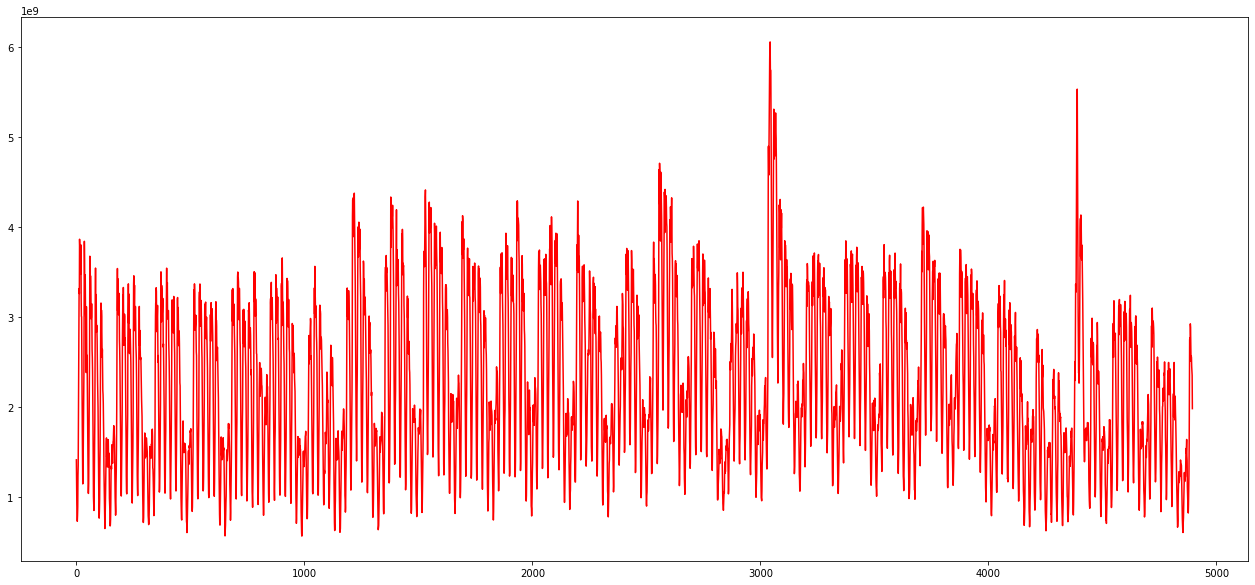

In [ ]:
import matplotlib.pyplot as plt
sessions = data['Sessions'].values

# plot entire data
ar = np.arange(len(sessions))
plt.figure(figsize=(22,10))
plt.plot(ar, sessions,'r')
plt.show()

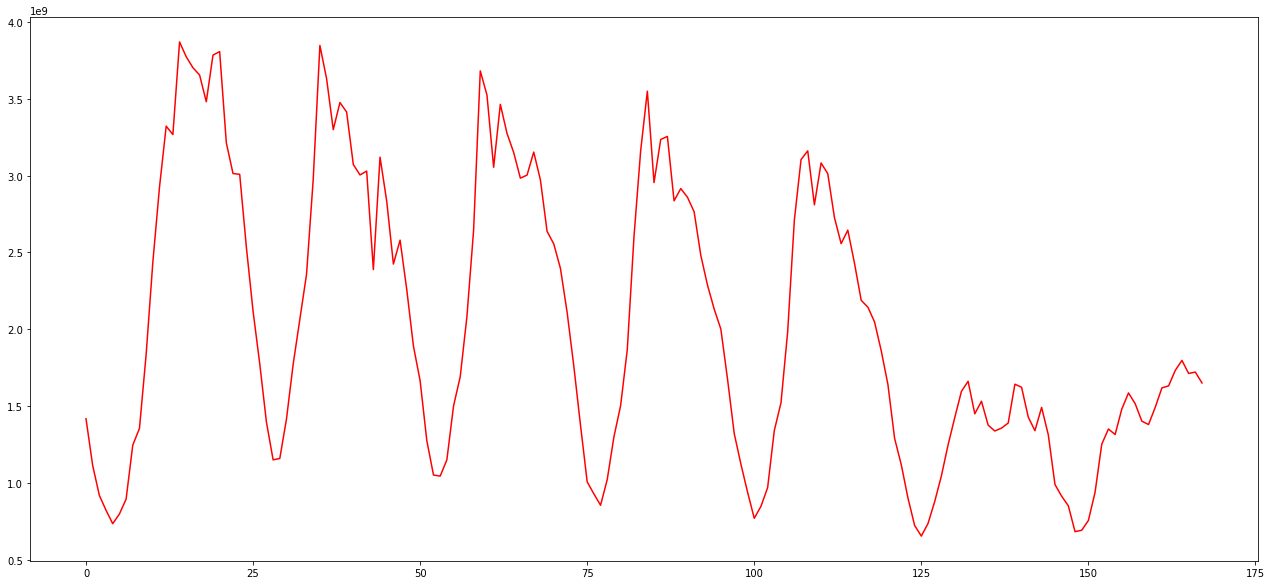

In [ ]:
# first week web traffic
sample = sessions[:168]
ar = np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar, sample,'r')
plt.show()

# **1.4  Data Preparation**

We will model the problem to predict the traffic for the next hour based on the previous week data i.e. 168 hours. Lets define a function to prepare the input and output data accordingly.

Note: The input is a sequence of values and the output is a single value.

In [ ]:
def prepare_data(seq,num):
  x=[]
  y=[]

  for i in range(0,(len(seq)-num),1):
    
    input_ = seq[i:i+num]
    output  = seq[i+num]
    
    x.append(input_)
    y.append(output)
    
  return np.array(x), np.array(y)

call the function

In [ ]:
num=168
x,y= prepare_data(sessions,num)

In [ ]:
print(len(x))

4728


No. of input sequences is over 4700

In [ ]:
x[0]

array([1418159421, 1113769116,  919158921,  822352824,  735526737,
        798400800,  895206897, 1246503249, 1355285358, 1836321840,
       2435122440, 2925140931, 3321347328, 3266457273, 3869249877,
       3772443780, 3701585709, 3653681661, 3480029487, 3783421791,
       3806375814, 3212565219, 3012965019, 3007975014, 2532926538,
       2117758122, 1775443779, 1396203399, 1150695153, 1159677162,
       1416163419, 1772449776, 2063866068, 2357278362, 2974042980,
       3846295854, 3630727638, 3298393305, 3475039482, 3413163420,
       3071847078, 3003983010, 3028933035, 2388216393, 3119751126,
       2833324839, 2424144429, 2579832585, 2257478262, 1890213894,
       1664665668, 1275445278, 1051893054, 1044907047, 1150695153,
       1500993504, 1691611695, 2081830086, 2642706648, 3680627688,
       3523941531, 3053883060, 3463063470, 3274441281, 3149691156,
       2983024989, 3002985009, 3152685159, 2971048977, 2636718642,
       2554882560, 2395202400, 2108776113, 1759475763, 1375245

In [ ]:
y[0]

1427141430

**Split the dataset into training and validation data**

Note - Its a TimeSeries problem, we are not splitting the data randomaly, we are splitting it in a sequencial manner

In [ ]:
ind = int(0.9 * len(x))

x_train = x[:ind]
y_train = y[:ind]

x_valid=x[ind:]
y_valid=y[ind:]

Normalize the input and output data as it speeds up the training process

In [ ]:
from sklearn.preprocessing import StandardScaler

#normalize the inputs
x_scaler= StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_valid= x_scaler.transform(x_valid)

#reshaping the output for normalization
y_train=y_tr.reshape(len(y_train),1)
y_valid=y_valid.reshape(len(y_valid),1)

#normalize the output
y_scaler=StandardScaler()
y_train = y_scaler.fit_transform(y_train)[:,0]
y_valid = y_scaler.transform(y_valid)[:,0]


In [ ]:
print(x_train.shape)

(4255, 168)


As you can see here, the input data is a 2 dimenional array but the LSTM accepts only 3 dimensional inputs in the form of (no. of samples, no. of timesteps, no. of features)

So, reshaping the input data as per the model requirement

In [ ]:
#reshaping input data
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_valid= x_valid.reshape(x_valid.shape[0],x_valid.shape[1],1)

In [ ]:
print(x_train.shape)

(4255, 168, 1)


Now the data is ready for model training data

# **1.5  Model Building**

**Define the model architecture**

In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

model= Sequential()

model.add(Conv1D(64, 3, padding='same', activation='relu',input_shape=(num,1)))

model.add(Conv1D(32, 5, padding='same', activation='relu',input_shape=(num,1)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

activation function at a final layer is linear this  is because we have to predict continious values and not some class tags or catagoris, as it is a regression problem not a classification problem

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 168, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 168, 32)           10272     
_________________________________________________________________
flatten (Flatten)            (None, 5376)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                344128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 354,721
Trainable params: 354,721
Non-trainable params: 0
_________________________________________________________________


# **Define the optimizers and loss**

In [ ]:
model.compile(loss='mse', optimizer='adam')

# **Define a call back to save the best model during the training**

In [ ]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True,mode='min')

# **Train the model for 30 epochs with batch size of 32**

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_valid, y_valid), callbacks=[mc])

Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 0.1026
Epoch 00001: val_loss improved from inf to 0.03657, saving model to best_model.hdf5
133/133 [==============================] - 1s 5ms/step - loss: 0.1026 - val_loss: 0.0366
Epoch 2/30
120/133 [==========================>...] - ETA: 0s - loss: 0.0271
Epoch 00002: val_loss improved from 0.03657 to 0.02507, saving model to best_model.hdf5
133/133 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.0251
Epoch 3/30
117/133 [=========================>....] - ETA: 0s - loss: 0.0211
Epoch 00003: val_loss improved from 0.02507 to 0.01813, saving model to best_model.hdf5
133/133 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.0181
Epoch 4/30
121/133 [==========================>...] - ETA: 0s - loss: 0.0155
Epoch 00004: val_loss did not improve from 0.01813
133/133 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0195
Epoch 5/30
124/133 [=====

**Load the weights of best model prior to predictions**

In [ ]:
model.load_weights('best_model.hdf5')

**Evaluate the performance of model on the validation data**

In [ ]:
mse = model.evaluate(x_valid,y_valid)
print("Mean Square Error:",mse)

15/15 [==============================] - 0s 2ms/step - loss: 0.0147
Mean Square Error: 0.014654028229415417


# **1.6  Comparision with Baseline Model**

In [ ]:
# build a simple moving average model
def compute_moving_average(data):
  pred=[]
  for i in data:
    avg=np.sum(i)/len(i)
    pred.append(avg)
  return np.array(pred)

# reshape the data
x_reshaped = x_valid.reshape(-1,168)

# get predictions
y_pred = compute_moving_average(x_reshaped)

In [ ]:
# evaluate the performance of model on the validation data
mse = np.sum ( (y_valid - y_pred) **2 ) / (len(y_valid))
print(mse)

0.5546025834434455


# **1.7  Forecasting**

Steps to Follow:

1 Intialize the array, say "data" with a weeks data,

2 Predict for the next hour,

3 Append the predicted value as the last element of array "data",

4 Skip the first element of array "data",

5 Repeat steps 2 to 4 for N iterations,

Define a function which forecasts the traffic for the next hours from the previous week data.

In [ ]:
def forecast(x_valid, no_of_pred, ind):
  predictions=[]

  #intialize the array with a weeks data
  temp=x_valid[ind]

  for i in range(no_of_pred): 

    #predict for the next hour
    pred=model.predict(temp.reshape(1,-1,1))[0][0]
    
    #append the prediction as the last element of array
    temp = np.insert(temp,len(temp),pred)
    predictions.append(pred)

    #ignore the first element of array
    temp = temp[1:]

  return predictions

Its time to forecast the traffic for the next 24 hours based on the previous week data

In [ ]:
no_of_pred =24
ind=72
y_pred= forecast(x_valid,no_of_pred,ind)
y_pred

[-1.6659011,
 -1.5390075,
 -1.2562358,
 -1.0126257,
 -0.9156452,
 -0.8260273,
 -0.92993873,
 -0.8669676,
 -0.86675143,
 -0.7408094,
 -0.68569016,
 -0.53150344,
 -0.42098165,
 -0.36868167,
 -0.365601,
 -0.31457537,
 -0.40688735,
 -0.6308613,
 -0.9276068,
 -1.2016231,
 -1.3683954,
 -1.5217065,
 -1.6345366,
 -1.6945374]

In [ ]:
y_true = y_valid[ind:ind+(no_of_pred)]
y_true

array([-1.49374192, -1.41747393, -1.1723268 , -0.85200121, -0.76156916,
       -0.71036065, -0.75176328, -0.68639071, -0.73977831, -0.84873259,
       -0.79861362, -0.81277767, -0.56436192, -0.60685409, -0.61883906,
       -0.69728614, -0.73977831, -0.90538881, -1.26711702, -1.3531909 ,
       -1.51662232, -1.69966551, -1.69748643, -1.73779951])

Lets convert back the normalized values to the original dimensional space

In [ ]:
y_true= y_scaler.inverse_transform(y_true)
y_pred= y_scaler.inverse_transform(y_pred)

In [ ]:
def plot(y_true,y_pred):
  ar = np.arange(len(y_true))
  plt.figure(figsize=(22,10))
  plt.plot(ar, y_true,'r')
  plt.plot(ar, y_pred,'y')
  plt.show()

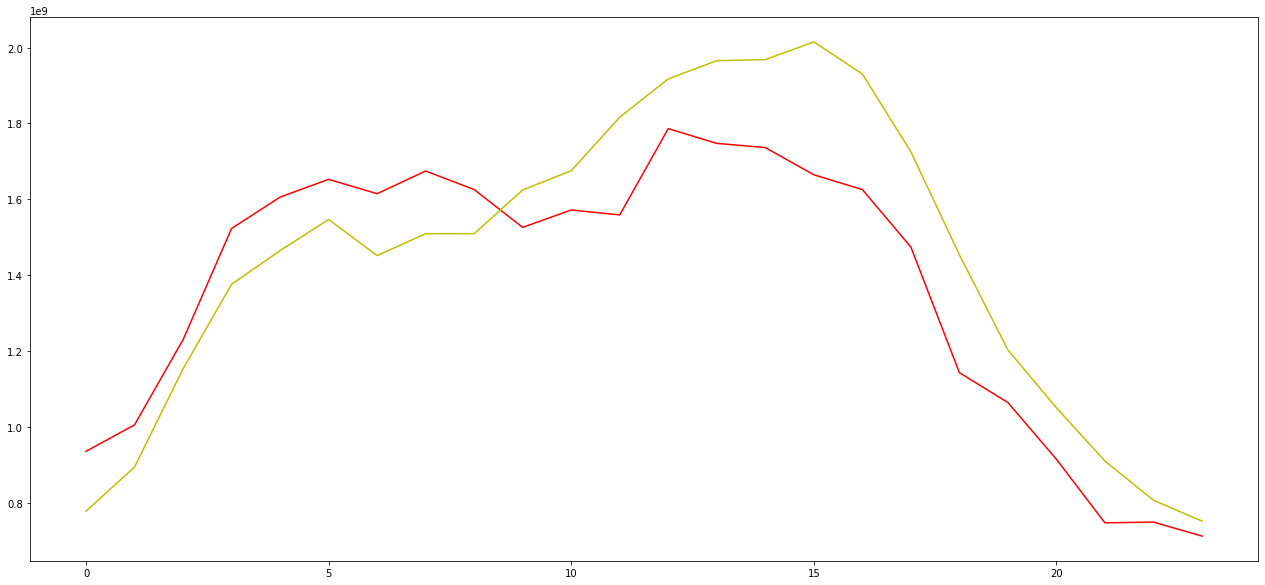

In [ ]:
plot(y_true,y_pred)

**The forecasted values are almost close to the actual values.**